<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>


# **실습: 이변량 분석 ④ - 수치형  → 범주형**

## **1. 환경준비**

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Attrition 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition_simple2.csv'
attrition = pd.read_csv(path)
attrition.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


**📋 데이터 정보**

- Attrition: 이직 여부 (1: 이직, 0: 잔류)
- Age: 나이
- DistanceFromHome: 집-직장 거리 (단위: 마일)
- EmployeeNumber: 사번
- Gender: 성별 (Male, Female)
- JobSatisfaction: 직무만족도(1: Low, 2: Medium, 3: High, 4: Very High)
- MaritalStatus: 결혼 상태 (Single, Married, Divorced)
- MonthlyIncome: 월급 (단위: 달러)
- OverTime: 야근 여부 (Yes, No)
- PercentSalaryHike: 전년 대비 급여 인상율(단위: %)
- TotalWorkingYears: 총 경력 연수

## **2. 시각화**

- 다음 두 변수들 간의 관계를 Histogram과 Density Plot으로 시각화해 확인하세요.

**1️⃣ 나이(Age) → 이직 여부(Attrition)**

- Histogram

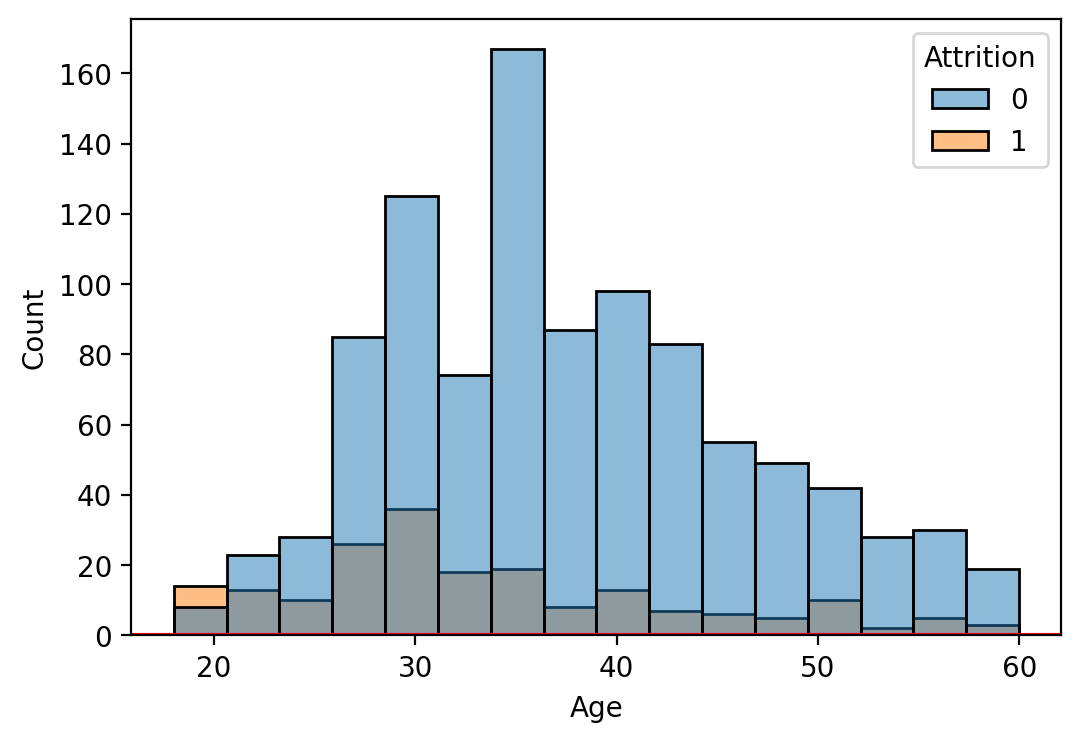

In [14]:
sns.histplot(x='Age', hue='Attrition', data=attrition, bins=16)
plt.axhline(attrition['Attrition'].mean(), color='r')
plt.show()

- Density Plot

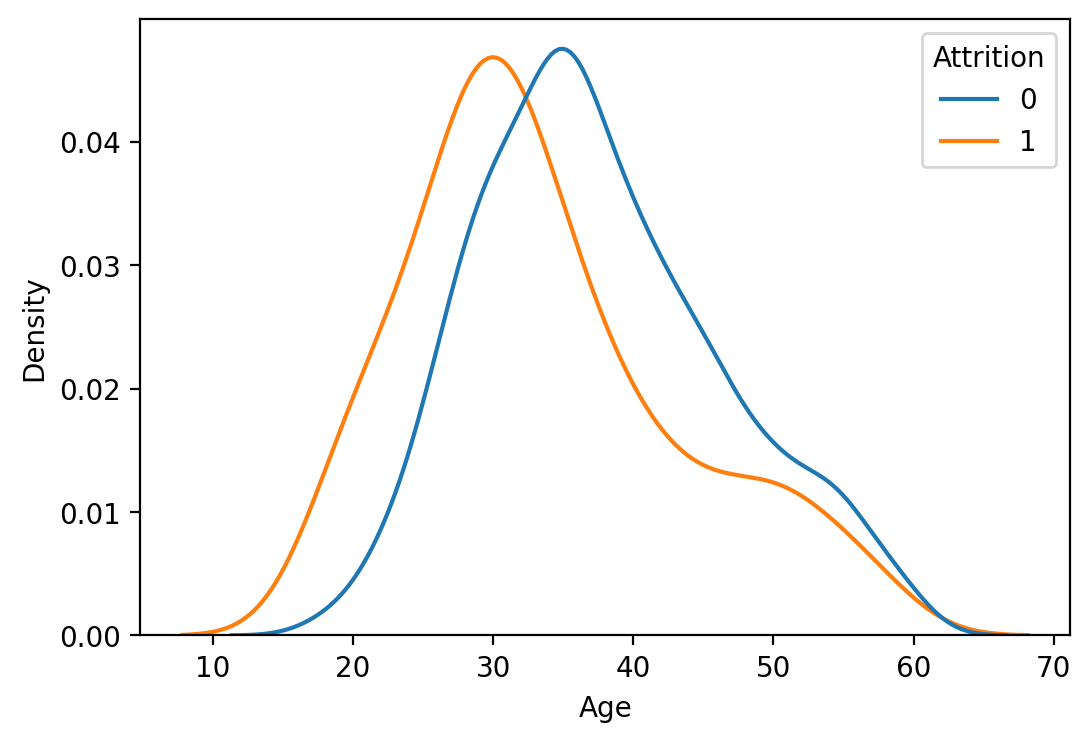

In [17]:
sns.kdeplot(x='Age', hue='Attrition', data=attrition, common_norm=False)
plt.show()

- multiple='fill'

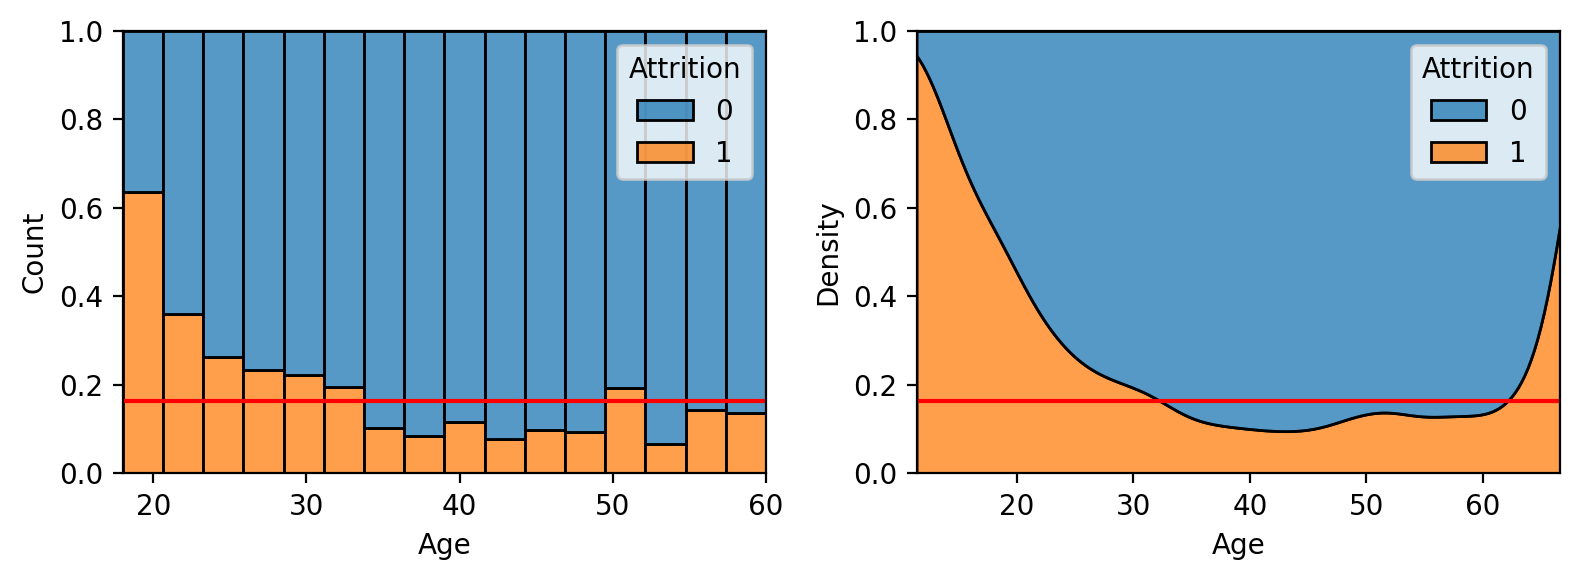

In [18]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.histplot(x='Age', hue='Attrition', data=attrition, bins=16, multiple='fill')
plt.axhline(attrition['Attrition'].mean(), color='r')

plt.subplot(1,2,2)
sns.kdeplot(x='Age', hue='Attrition', data=attrition, multiple='fill')
plt.axhline(attrition['Attrition'].mean(), color='r')

plt.tight_layout()
plt.show()

- **질문:** 위 시각화 결과에서 무엇을 확인할 수 있나요?

In [3]:
#

**2️⃣ 월급(MonthlyIncome) → 이직 여부(Attrition)**

- Histogram

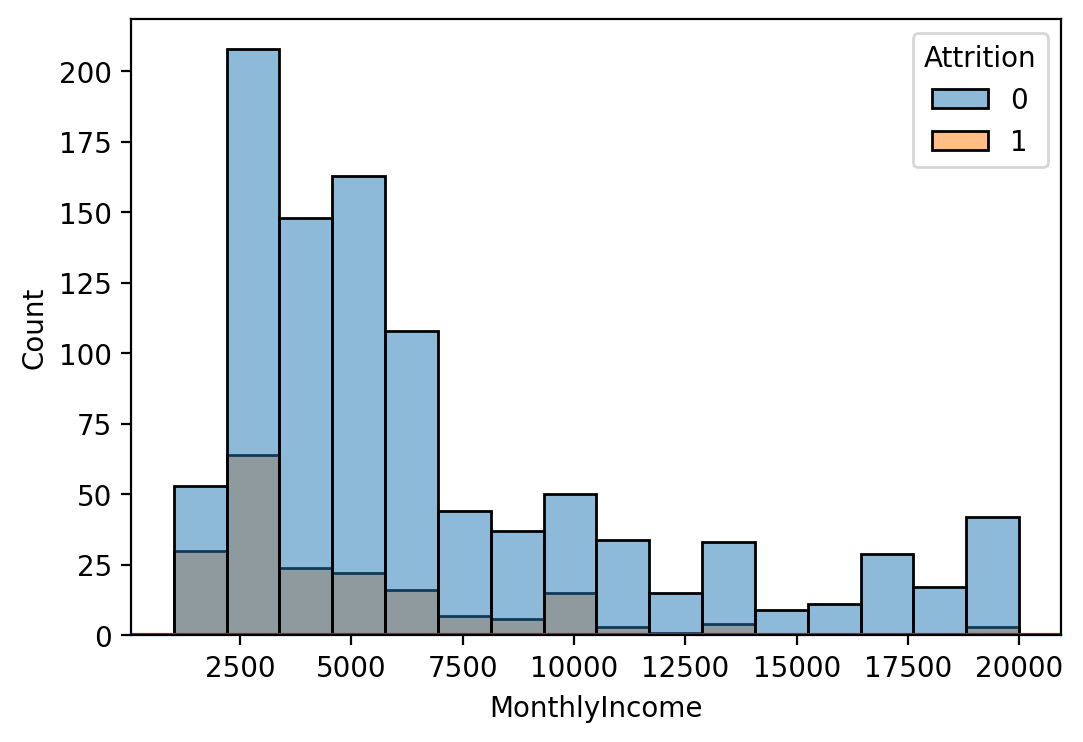

In [19]:
sns.histplot(x='MonthlyIncome', hue='Attrition', data=attrition, bins=16)
plt.axhline(attrition['Attrition'].mean(), color='r')
plt.show()

- Density Plot

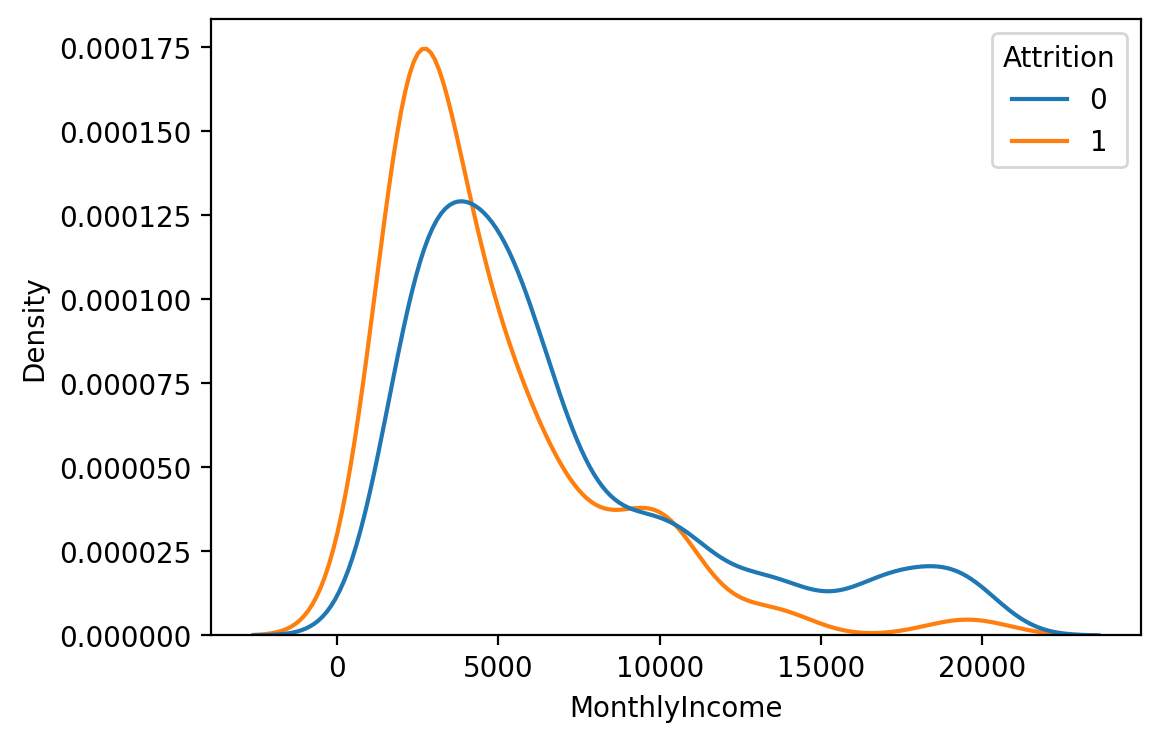

In [20]:
sns.kdeplot(x='MonthlyIncome', hue='Attrition', data=attrition, common_norm=False)
plt.show()

- multiple='fill'

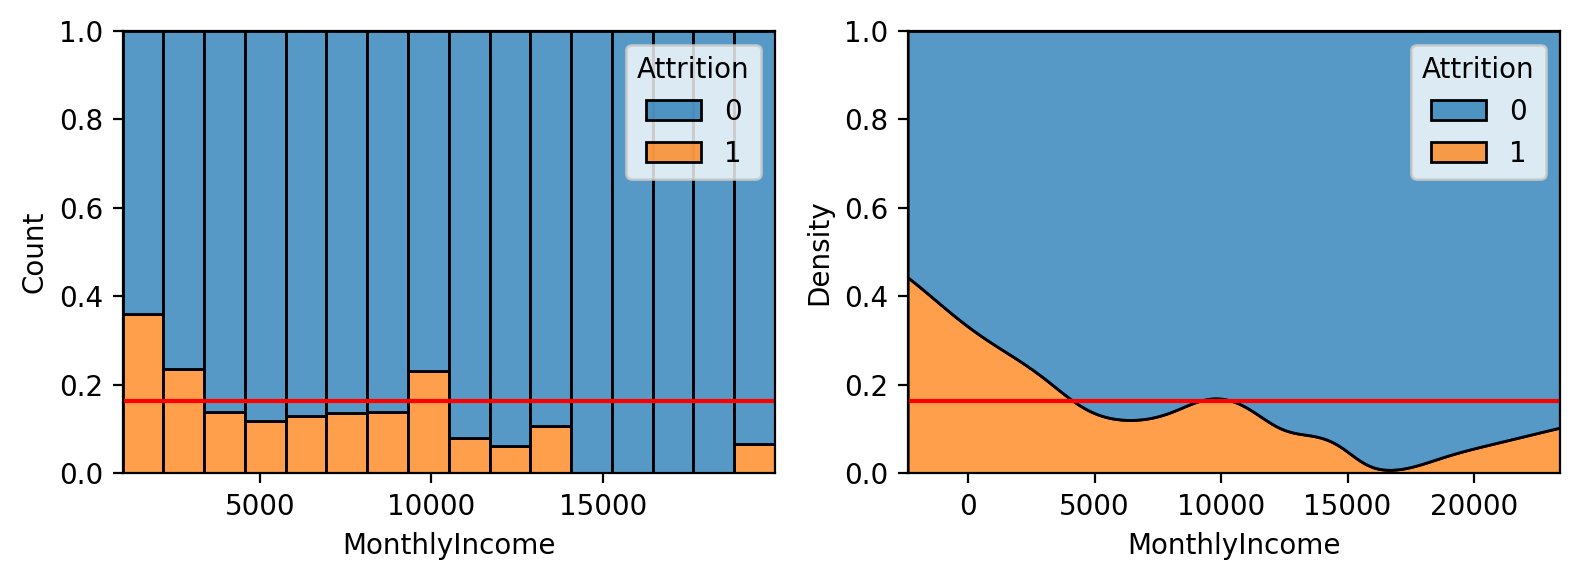

In [21]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.histplot(x='MonthlyIncome', hue='Attrition', data=attrition, bins=16, multiple='fill')
plt.axhline(attrition['Attrition'].mean(), color='r')

plt.subplot(1,2,2)
sns.kdeplot(x='MonthlyIncome', hue='Attrition', data=attrition, multiple='fill')
plt.axhline(attrition['Attrition'].mean(), color='r')

plt.tight_layout()
plt.show()

- **질문:** 위 시각화 결과에서 무엇을 확인할 수 있나요?

In [4]:
#

**3️⃣ 경력 연수(TotalWorkingYears) → 이직 여부(Attrition)**

- Histogram

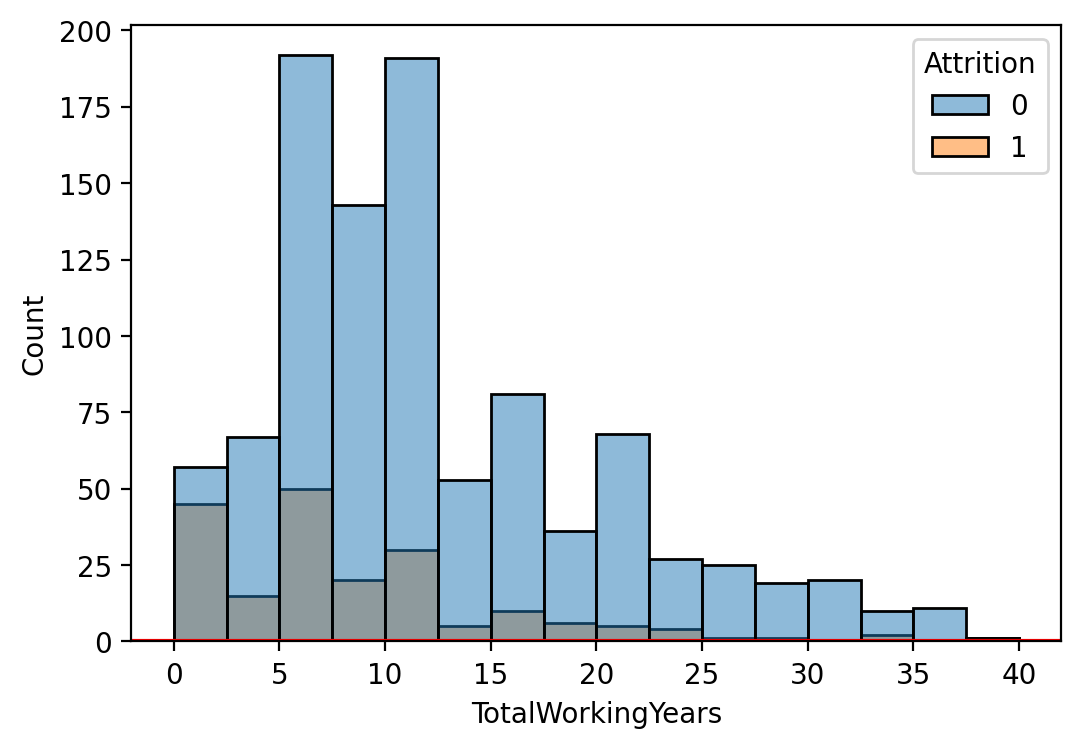

In [22]:
sns.histplot(x='TotalWorkingYears', hue='Attrition', data=attrition, bins=16)
plt.axhline(attrition['Attrition'].mean(), color='r')
plt.show()

- Density Plot

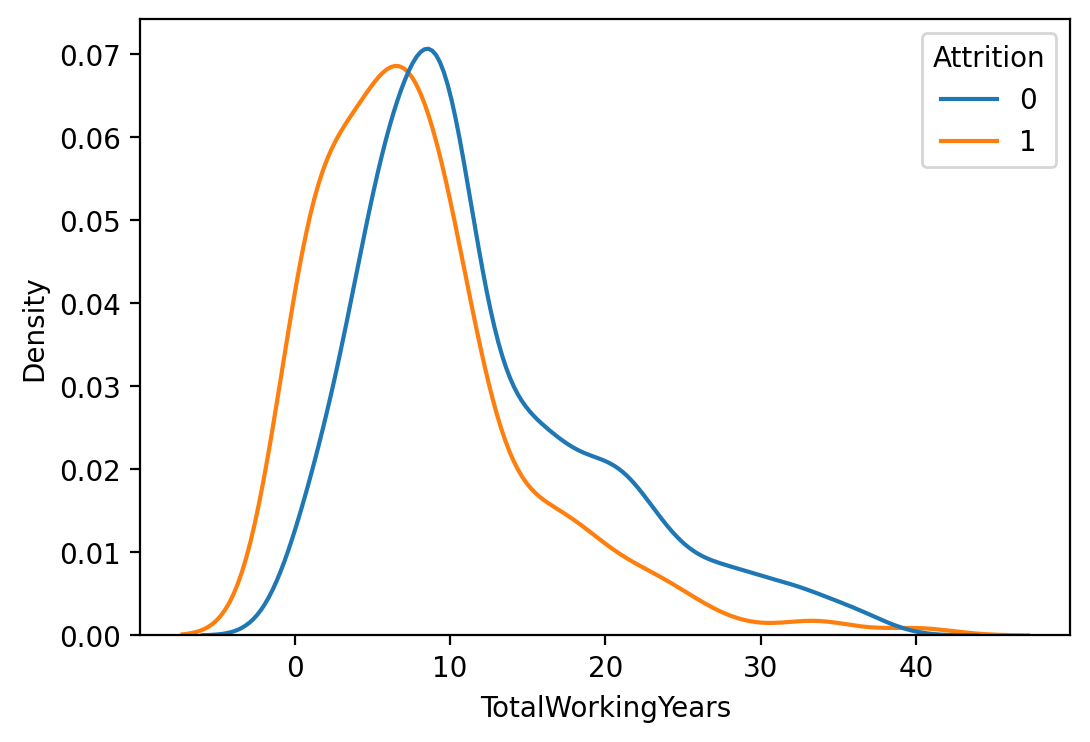

In [23]:
sns.kdeplot(x='TotalWorkingYears', hue='Attrition', data=attrition, common_norm=False)
plt.show()

- multiple='fill'

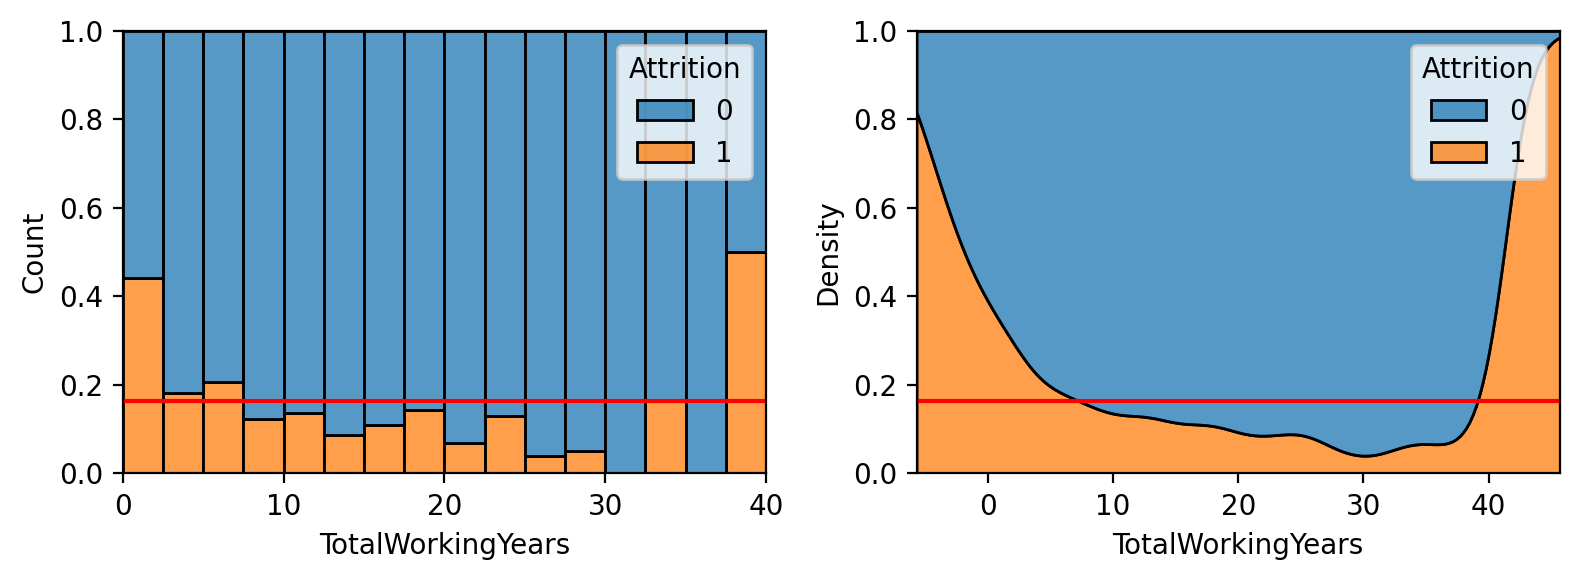

In [24]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.histplot(x='TotalWorkingYears', hue='Attrition', data=attrition, bins=16, multiple='fill')
plt.axhline(attrition['Attrition'].mean(), color='r')

plt.subplot(1,2,2)
sns.kdeplot(x='TotalWorkingYears', hue='Attrition', data=attrition, multiple='fill')
plt.axhline(attrition['Attrition'].mean(), color='r')

plt.tight_layout()
plt.show()

- **질문:** 위 시각화 결과에서 무엇을 확인할 수 있나요?

In [5]:
#

## **3. 수치화**

- 숫자 vs 범주에 대해 딱 맞는 가설검정 도구가 없으므로, 로지스틱 회귀모델로 부터 p-value를 구해보세요.

**1️⃣ 나이(Age) → 이직 여부(Attrition)**

In [27]:
model = sm.Logit(attrition['Attrition'], attrition['Age'])
result = model.fit()
print(result.pvalues)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.430080
         Iterations 5
Age    7.135567e-95
dtype: float64
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1196
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            0
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                 0.03284
Time:                        16:18:59   Log-Likelihood:                -514.38
converged:                       True   LL-Null:                       -531.84
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0463      0.002    -20.665      0.000      -0.051      -

- **질문:** 위 수치화 결과에서 무엇을 확인할 수 있나요?

In [6]:
#

**2️⃣ 월급(MonthlyIncome) → 이직 여부(Attrition)**

In [28]:
model = sm.Logit(attrition['MonthlyIncome'], attrition['Age'])
result = model.fit()
print(result.pvalues)
print(result.summary())

ValueError: endog must be in the unit interval.

- **질문:** 위 수치화 결과에서 무엇을 확인할 수 있나요?

In [7]:
#

**3️⃣ 경력 연수(TotalWorkingYears) → 이직 여부(Attrition)**

In [29]:
model = sm.Logit(attrition['TotalWorkingYears'], attrition['Age'])
result = model.fit()
print(result.pvalues)
print(result.summary())

ValueError: endog must be in the unit interval.

- **질문:** 위 수치화 결과에서 무엇을 확인할 수 있나요?

In [8]:
#